In [49]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import mrmr
from pymrmr import mRMR
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import mrmr
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import os.path
import json
from sklearn.metrics import auc, precision_recall_curve, average_precision_score, PrecisionRecallDisplay
import pymrmr
from scipy.stats import kruskal, mannwhitneyu, kendalltau, spearmanr
from boruta import BorutaPy
import umap.umap_ as umap
import icikt
from tqdm import tqdm
from sklearn.feature_selection import mutual_info_classif as MIC
from minepy import MINE

# Import data

In [50]:
# import data from csv 
cnv = pd.read_csv('dataset_hg19/dataset/cnv.csv', sep=' ')

cnv.head()

,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,C1orf159,...,SMIM9,SNORA36A,SNORA56,TMLHE,VBP1,IL9R|ENSG00000124334.12,SPRY3|ENSG00000168939.6,VAMP7|ENSG00000124333.10,WASH6P|ENSG00000182484.10,WASIR1|ENSG00000185203.7
TCGA-3C-AALI,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
TCGA-3C-AALK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-4H-AAAK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-5L-AAT1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-5T-A9QA,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0


In [51]:
miRNA = pd.read_csv('dataset_hg19/dataset/mirna.csv', sep=' ')

miRNA.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-941-3,hsa-mir-941-4,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
TCGA-3C-AALI,49201,98691,49035,148591,5095,3263,3566,133,41683,2231,...,0,0,52,0,4,8,383,547,1503,80378
TCGA-3C-AALK,57278,114320,57540,164553,18464,2114,8364,113,40723,2245,...,0,0,22,0,22,11,459,263,6620,152218
TCGA-4H-AAAK,67196,134563,67607,136918,20429,2162,10556,139,50848,2056,...,0,0,13,0,7,5,123,212,6666,158568
TCGA-5L-AAT1,94243,188921,94346,211457,21076,2657,12104,272,94610,3903,...,0,0,23,0,12,11,235,529,5352,196557
TCGA-5T-A9QA,49313,97721,49623,127544,2134,1769,8190,104,28306,2792,...,0,0,72,0,3,23,186,146,445,127728


In [52]:
mRNA = pd.read_csv('dataset_hg19/dataset/mrna.csv', sep=' ')

mRNA.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
TCGA-3C-AALI,436.55,0,0,130.32,8,13924.87,290,1,0,1633,...,110,825,2470,365,1110,10123,2425,748,1704,0
TCGA-3C-AALK,461.69,0,0,151.08,4,26490.85,1224,0,0,1878,...,133,1058,2088,424,1468,13756,1888,1694,161,0
TCGA-4H-AAAK,631.87,1,9,362.77,8,22525.79,804,1,1,1925,...,115,997,2467,33,1823,9498,1955,2072,440,0
TCGA-5L-AAT1,259.26,0,0,125.12,5,18903.93,323,1,0,971,...,55,697,1213,66,630,5421,1732,698,71,0
TCGA-5T-A9QA,600.72,1,1,446.68,0,6084.91,787,7,0,1670,...,55,547,1548,4,615,6160,2132,843,7,0


In [53]:
proteins = pd.read_csv('dataset_hg19/dataset/proteins.csv', sep=' ')

proteins.head()

,14-3-3_beta,14-3-3_epsilon,14-3-3_zeta,4E-BP1,4E-BP1_pS65,4E-BP1_pT37_T46,4E-BP1_pT70,53BP1,A-Raf,A-Raf_pS299,...,p27_pT157,p27_pT198,p38_MAPK,p38_pT180_Y182,p53,p62-LCK-ligand,p70S6K,p70S6K_pT389,p90RSK,p90RSK_pT359_S363
TCGA-3C-AALI,-0.000752,0.022553,0.021112,0.101796,-0.382850,-0.108997,0.103860,-0.335720,0.139450,0.148123,...,-0.076626,-0.231296,-0.169884,0.040360,-0.043975,1.293687,0.783984,0.162565,-0.667649,-0.102581
TCGA-3C-AALK,-0.202252,0.077041,0.153997,0.299107,-0.438903,-0.460678,-0.358195,0.474016,0.376476,-0.160318,...,-0.219547,-0.340080,0.208381,0.365363,-0.136875,0.680809,0.612644,-0.131174,0.419210,-0.118623
TCGA-4H-AAAK,-0.208434,0.062566,0.034209,0.429696,-0.102852,-0.499466,-0.433138,0.143794,0.339525,-0.221161,...,-0.070647,-0.471717,-0.052702,0.068514,-0.080364,0.300677,0.819253,-0.520017,0.003252,-0.855659
TCGA-5L-AAT1,-0.465476,0.141845,0.232721,0.427772,-0.231596,0.276124,-0.411702,0.736283,0.398665,-0.063979,...,-0.145362,-0.582255,0.346637,0.289421,-0.225658,0.591818,0.623455,-0.559783,0.510494,-0.601296
TCGA-5T-A9QA,-0.354823,0.156575,0.249023,1.197526,0.447913,1.001215,0.307314,0.581762,0.316779,-0.085146,...,0.076588,-0.325001,0.166015,-1.064492,0.181296,-0.226434,0.842169,0.280629,0.524148,-0.500144


# Import label

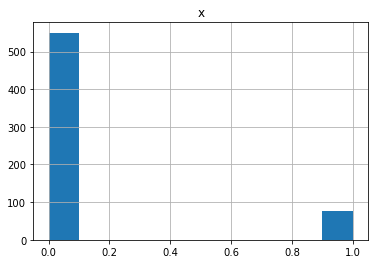

In [54]:
label = pd.read_csv('dataset_hg19/dataset/labels_pfi.csv', sep=' ')

label.hist()
plt.show()

# Check NaN values

In [55]:
def checkNaNValues(dataset):
    if dataset.isna().sum().sum() == 0:
        print(f"Non sono presenti dati NaN")
    else:
        for column in dataset:
            if dataset[column].isna().sum() == 0:
                print(f"Nella colonna {column} non sono presenti dati NaN")
            else:
                print(f"Nella colonna {column} sono presenti: {dataset[column].isna().sum()}")

In [56]:
checkNaNValues(cnv)

Non sono presenti dati NaN


In [57]:
checkNaNValues(mRNA)

Non sono presenti dati NaN


In [58]:
checkNaNValues(miRNA)

Non sono presenti dati NaN


In [59]:
checkNaNValues(proteins)

Non sono presenti dati NaN


# Normalize data

In [60]:
def dataNormalization(scaler, data):
    scl = scaler()
    model = scl.fit(data)
    scaled_data = model.transform(data)
    
    return pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

# Filter feature with low variability

In [61]:
def filter_features_with_low_variability(data, alfa) -> pd.DataFrame:
    #Delete columns with standard deviation < alfa (0.10?)
    for column in data:
        if data[column].std() < alfa:
            #print(f'column: {column} has standard deviation < {alfa}, removed')
            data.drop(column, axis=1, inplace=True)
            
    return data

# Normalize and filter datasets

In [62]:
dataset_dict = {'cnv': cnv, 'miRNA': miRNA, 'mRNA': mRNA, 'proteins': proteins}

In [63]:
def create_data_normalized_filtered(data_dict, scaler, min_variance):
    dict_filtered_nornalize = {}
    for (key, value) in zip(data_dict, data_dict.values()):
        if key != 'cnv':
            dict_filtered_nornalize[key] = filter_features_with_low_variability(dataNormalization(MinMaxScaler, value), 0.05)
        else:
            dict_filtered_nornalize[key] = value
    return dict_filtered_nornalize

# Store and retrieve data normalize and filtered

In [64]:
def mkdir_p(path):
    try:
        os.makedirs(path)
    except OSError as exc: # Python >2.5
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else: raise

In [65]:
def store_filtered_normalize_data(dataset_dict):
    if not os.path.exists('filtered_normalize_data'):
        mkdir_p('filtered_normalize_data')
        filtered_normalize_data = create_data_normalized_filtered(dataset_dict, MinMaxScaler, 0.05)
        for data in dataset_dict:
            filtered_normalize_data[data].to_json('filtered_normalize_data/'+data+'.json')

In [66]:
def load_filtered_normalize_data(dataset_dict):
    dict_test = {}
    if os.path.exists('filtered_normalize_data'):
        for data in dataset_dict:
            with open('filtered_normalize_data/'+data+'.json', 'r') as fp:
                dataset = pd.read_json(fp)
                dict_test[data] = dataset
        return dict_test
    else:
        store_filtered_normalize_data(dataset_dict)
        load_filtered_normalize_data(dataset_dict)

In [67]:
%time datasets = load_filtered_normalize_data(dataset_dict)

CPU times: user 19.3 s, sys: 953 ms, total: 20.3 s
Wall time: 20.1 s


In [68]:
#baseline AUPRC
label[label['x'] == 1].count()/len(label)

x    0.122807
dtype: float64

# Correlation with Spearman on cnv

In [69]:
p_value_threshold = 0.05
correlation_threshold = 0.01

In [70]:
def compute_spearmanr_with_label(dataset, label):
    not_correlated_features = []
    for feature in tqdm(dataset.columns, desc=f"Running Pearson test on cnv", dynamic_ncols=True, leave=False):
        correlation, p_value = spearmanr(dataset[feature].values.flatten(), label.values.flatten())
        if p_value > p_value_threshold:
            #print(f"In cnv the feature {feature} does not correlate in a statistically significant manner with the output. p-value:{p_value} -- correlation:{correlation}")
            not_correlated_features.append(feature)
    return not_correlated_features

In [71]:
def spearmanr_between_feature(
    X:pd.DataFrame,
    feature_left: str,
    feature_right: str,
):
    """Returns Spearman correlation.
    
    Implementative details
    ------------------------------
    We may need to recompute this value across
    multiple re-runs of the jupyter notebook,
    so since it takes a bit of time to do so we cache it.
    
    Parameters
    ----------------------
    X:pd.DataFrame,
        The epigenomic data.
    feature_left: str,
        The left features to compute pearson for.
    feature_right: str,
        The right features to compute pearson for.
    """
    correlation, p_value = spearmanr(
        X[feature_left].values.flatten(),
        X[feature_right].values.flatten(),
    )
    return dict(
        correlation=correlation,
        p_value=p_value
    )

In [72]:
def compute_spearmanr_between_feature(dataset):
    spearman_result = []
    score = []
    highly_correlated_future = []
    for feature_left in tqdm(dataset.columns, desc=f"Running Spearman test", dynamic_ncols=True, leave=False):
        for feature_right in dataset.columns:
                spearman_result  = spearmanr_between_feature(dataset,feature_left,feature_right)
                
                score.append(spearman_result)
                if feature_left!=feature_right and spearman_result["p_value"] < p_value_threshold and np.abs(spearman_result["correlation"]) > 0.95:
                    correlation = spearman_result["correlation"]
                    #print(f"The feature {feature_left} is highly correlated with {feature_right} ({correlation}).")
                    highly_correlated_future.append(feature_left)
    return highly_correlated_future

## Creation cnv dataset after drop feature not correlated with output and features with higly correlations with other features

In [73]:
def compure_all_spearman(dataset, label):
    #Drop features not correlated with output
    new_df = dataset.drop(compute_spearmanr_with_label(dataset, label), axis=1)
    high_correlated_feature = compute_spearmanr_between_feature(new_df)
    return new_df.drop(high_correlated_feature, axis=1).columns

In [74]:
#compure_all_spearman(datasets['cnv'])

# Correlation with Mine

In [75]:
def compute_mine(dataset, label):
    feature_to_drop = []
    for feature in tqdm(dataset.columns, desc=f"Running MINE test", dynamic_ncols=True, leave=False):
        mine = MINE()
        mine.compute_score(dataset[feature].values.ravel(), label.values.ravel())
        score = mine.mic()
        if score < correlation_threshold:
            feature_to_drop.append(feature)
    return dataset.drop(feature_to_drop, axis=1).columns

In [76]:
#compute_mine(datasets['mRNA'])

# Univariate feature selection using Kruskal-Wallis e Mann-Whitney

In [77]:
def create_dataframe_pos_neg(dataset, label):
    return (dataset[label['x']==1], dataset[label['x']==0])

In [78]:
def univariate_features_selection(dataset, label, univariate_tecnique, min_pValue):
    pos, neg = create_dataframe_pos_neg(dataset, label)
    H, pval = univariate_tecnique(pos, neg)
    mask = (pval < min_pValue)
    return dataset.columns[mask]

# Umap

In [79]:
def execute_umap(n_components, X, y):
    return umap.UMAP(n_neighbors=5, n_components=n_components, random_state=42).fit_transform(X, y)

# Multivariate feature selection, mrmr and Boruta

In [80]:
def execute_mrmr(dataset, n_feature):
    print('entra in mrmr')
    return mRMR(dataset, 'MIQ', n_feature)

In [81]:
def execute_boruta_feature_selection(
    X_train: pd.DataFrame,
    y_train: np.ndarray,
    holdout_number: int,
    max_iter: int = 100,
):
    """Returns tuple with list of kept features and list of discared features.
    
    Parameters
    --------------------------
    X_train: pd.DataFrame,
        The data reserved for the input of the training of the Boruta model.
    y_train: np.ndarray,
        The data reserved for the output of the training of the Boruta model.
    holdout_number: int,
        The current holdout number.
    max_iter: int = 100,
        Number of iterations to run Boruta for.
    """
    
    print('execute boruta')

    model = RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=5)
    
    boruta_selector = BorutaPy(
        model,
        n_estimators='auto',
        verbose=False,
        alpha=0.05,
        max_iter=max_iter, 
        random_state=42,
    )
    boruta_selector.fit(X_train.values, y_train.values.ravel())
    
    kept_features = list(X_train.columns[boruta_selector.support_])
    discarded_features = list(X_train.columns[~boruta_selector.support_])
    
    return kept_features, discarded_features

# Train

In [82]:
def train_model(key, label, num_extenal_fold, type_feature_selection):
    
    """Return AUPRC score after training.
    
    Parameters
    --------------------------
    dataset: string,
        The data reserved for the input of the training.
    label: pd.DataFrame,
        The data reserved for the output of the training.
    num_external_fold: int,
        The current holdout number.
    type_feature_selection: string,
        Type of feature selection: ['kruskal', 'mrmr', 'mannwhitneyu', 'boruta']
    min_pValue: int,
        Minimum value of p_value. Valid if type_feature_selection == 'kruskal' or 'mannwhitneyu',
    use_umap: bool,
        Specified to use or not use UMAP for feature extraction after univariate feature selection (kruskal, mannwhitneyu)
    """
    
    aucs =[]
    dataset = datasets[key]
    y_score_concatenated = []
    y_test_fold_concatenated = []
    
    #to numpy
    X_numpy = dataset.to_numpy()
    y_numpy = label['x'].to_numpy()
    
    external_fold = StratifiedKFold(n_splits=num_extenal_fold, shuffle=True, random_state=1)
    
    for train_index, test_index in tqdm(external_fold.split(X_numpy, label), desc=f"Running fold ", dynamic_ncols=True, leave=False):
        
        X_train_fold, X_test_fold = X_numpy[train_index], X_numpy[test_index]
        y_train_fold, y_test_fold = y_numpy[train_index], y_numpy[test_index]
        
        df_X_train = pd.DataFrame(data=X_train_fold, columns=dataset.columns)
        df_X_test = pd.DataFrame(data=X_test_fold, columns=dataset.columns)
        df_y_train = pd.DataFrame(data=y_train_fold, columns=label.columns)
        
        
        #feature selection
        if 'kruskal' in type_feature_selection:
            selected_features = univariate_features_selection(df_X_train, df_y_train, kruskal, 0.05)
        elif 'mannwhitneyu' in type_feature_selection:
            selected_features = univariate_features_selection(df_X_train, df_y_train, mannwhitneyu, 0.05)
        elif type_feature_selection == "mrmr":
            selected_features = execute_mrmr(df_X_train, 100)
        elif type_feature_selection == 'boruta':
            selected_features, discarded_feature =  execute_boruta_feature_selection(df_X_train, df_y_train, 5)
        elif type_feature_selection == 'mine':
            selected_features = compute_mine(df_X_train, df_y_train)
        elif type_feature_selection == 'spearman':
            selected_features = compure_all_spearman(df_X_train, df_y_train)
        else:
            return "Invalid", "type of feature selection"
              
        X_train_selected_feature = df_X_train[selected_features]
        X_test_selected_feature = df_X_test[selected_features]
        
        print(f'NUMERO FEATURE SELEZIONATE: {len(selected_features)}')
        print('*'*60)
        
        if 'umap' in type_feature_selection:
            X_train_selected_feature = execute_umap(len(selected_features), X_train_selected_feature, y_train_fold)
            X_test_selected_feature = execute_umap(len(selected_features), X_test_selected_feature , y_test_fold)
            

        clf = GridSearchCV(estimator=RandomForestClassifier(),
                           scoring='average_precision',
                           param_grid=model_selection_grid_DT, 
                           cv=2, 
                           n_jobs=-1)
        clf.fit(X_train_selected_feature, y_train_fold)

        #auc = clf.best_estimator_.score(X_test_selected_feature, y_test_fold)
        
        # Create classifier
        #clf = RandomForestClassifier(random_state=1)
        #clf.fit(X_train_selected_feature, y_train_fold)
        
        # Get the predicited probability of testing data
        y_score = clf.predict_proba(X_test_selected_feature)[:, 1]
        
        #calculate precision and recall
        precision, recall, thresholds = precision_recall_curve(y_test_fold, y_score)

        #plot_precision_recall_curve(classifier, X_test_selected_feature, y_test_fold)
        
        y_score_concatenated = np.concatenate((y_score_concatenated, y_score), axis=None)
        y_test_fold_concatenated = np.concatenate((y_test_fold_concatenated, y_test_fold), axis=None)
        
        
        # Use AUC function to calculate the area under the curve of precision recall curve
        auc_precision_recall = auc(recall, precision)
        
        aucs.append(auc_precision_recall)
        #print('auc: {:.3f} using params {}:'.format(auc_precision_recall, clf.best_params_))
    
    internal_auc = np.mean(aucs)
    
    #calculate precision and recall
    precision, recall, thresholds = precision_recall_curve(y_test_fold_concatenated, y_score_concatenated)
    
    external_auc = auc(recall, precision)

    #plot precision recall curve
    PrecisionRecallDisplay.from_predictions(y_test_fold_concatenated, y_score_concatenated)

    plt.title('Random_Forest external')
    #plt.show()
    plt.savefig('result/'+key+'/'+type_feature_selection+'_'+'AUC_External.pdf')
    
    return internal_auc, external_auc

In [83]:
model_selection_grid_DT = [
    {'criterion': ['gini', 'entropy'],
     'max_leaf_nodes': [None, 2, 5, 10],
     'max_features': [None, 'sqrt', 'log2'],
    'n_estimators': [51, 101, 251, 500]}
]

In [45]:
#test
#check = datasets['mRNA'].iloc[:, 0:50]
#test = {'mRNA':check}

In [84]:
#internal, external = train_model('mRNA', label, 3, 'mrmr')


#print(f'internal {internal}')
#print(f'external {external}')

In [85]:
#train_model('proteins', label, 2, 'mannwhitneyu')

In [86]:
#train_model('proteins', label, 10, 'mrmr')

# Train all datasets with combination of feature selection and feature extraction 

In [87]:
files_name = ['result/proteins/proteins.json', 'result/miRNA/mRNA.json', 'result/mRNA/miRNA.json', 'result/cnv/cnv.json']
dataset_list = ['proteins', 'mRNA', 'miRNA', 'cnv']
feature_selection_list = ['mannwhitneyu', 'mrmr', 'mannwhitneyu_with_umap']

In [88]:
def create_result_json(result_dict, feature_selection_list, files_name, dataset_list, label):
    for file_name, key in tqdm(zip(files_name, dataset_list), desc=f"Running training ", dynamic_ncols=True, leave=False):
        #print(f'FILE NAME {file_name}')
        if os.path.exists(file_name):
            with open(file_name, 'r') as fp:
                saved_dict = json.load(fp)
                result_dict[key] = saved_dict
                for feature_selection in tqdm(feature_selection_list,desc=f"Running {key} training ", dynamic_ncols=True, leave=False):
                    #print(f'TECNICA DI FS exist {feature_selection}')
                    if not feature_selection in result_dict[key].keys():
                        result_dict[key][feature_selection] = {}    
                        result_dict[key][feature_selection]['internal'],  result_dict[key][feature_selection]['external'] = train_model(key, label, 10, feature_selection)
                        with open(file_name, 'w', encoding='utf-8') as fp:
                            json.dump(result_dict[key], fp, ensure_ascii=False, indent=4)
        else:
            result_dict[key] = {}
            for feature_selection in tqdm(feature_selection_list, desc=f"Running {key} training ", dynamic_ncols=True, leave=False):
                #print(f'TECNICA DI FS check {feature_selection}')
                result_dict[key][feature_selection] = {}    
                result_dict[key][feature_selection]['internal'],  result_dict[key][feature_selection]['external'] = train_model(key, label, 10, feature_selection)
            with open(file_name, 'w', encoding='utf-8') as fp:
                json.dump(result_dict[key], fp, ensure_ascii=False, indent=4)

In [89]:
result_dict = {}

dataset_list = ['cnv']
cnv_file_name = ['result/cnv/cnv.json']
feature_selection_list_cnv = ['spearman']

# Create cnv result using spearman

In [90]:
create_result_json(result_dict, feature_selection_list_cnv, cnv_file_name, dataset_list, label)

result_dict

Running training : 0it [00:00, ?it/s]
Running cnv training :   0%|                              | 0/1 [00:00<?, ?it/s]


{'cnv': {'spearman': {'internal': 0.10358684464048014,
   'external': 0.09547269861289438}}}

# Create proteins using mannwhitneyu, mrmr, mannwhitneyu_with_umap, mne

In [91]:
dataset_list = ['proteins']
proteins_file_name = ['result/proteins/proteins.json']
feature_selection_list = ['mannwhitneyu', 'mrmr', 'mannwhitneyu_with_umap', 'boruta','mine']

create_result_json(result_dict, feature_selection_list, proteins_file_name, dataset_list, label)

result_dict

Running training : 0it [00:00, ?it/s]
Running proteins training :   0%|                         | 0/5 [00:00<?, ?it/s]


{'cnv': {'spearman': {'internal': 0.10358684464048014,
   'external': 0.09547269861289438}},
 'proteins': {'mannwhitneyu': {'internal': 0.2025287367141339,
   'external': 0.1496988412832582},
  'mrmr': {'internal': 0.17924660745628065, 'external': 0.13569864713638802},
  'mannwhitneyu_with_umap': {'internal': 0.4310240373187262,
   'external': 0.17787602461967278},
  'boruta': {'internal': 0.152847153832749, 'external': 0.12288255671231038},
  'mine': {'internal': 0.15111204138279866, 'external': 0.12484018994991511}}}

# Create mRNA using mannwhitneyu, mrmr, mannwhitneyu_with_umap, mine, boruta

In [92]:
dataset_list = ['mRNA']
mrna_file_name = ['result/mrna/mrna.json']
feature_selection_list = ['mannwhitneyu', 'mrmr', 'mannwhitneyu_with_umap', 'boruta','mine']
check = ['mine']

create_result_json(result_dict, check, mrna_file_name, dataset_list, label)

result_dict

Running training : 0it [00:00, ?it/s]
Running mRNA training :   0%|                             | 0/1 [00:00<?, ?it/s]

Running fold : 0it [00:00, ?it/s]


Running MINE test:   0%|                              | 0/18465 [00:00<?, ?it/s]


Running MINE test:   0%|                    | 26/18465 [00:00<01:11, 258.44it/s]


Running MINE test:   0%|                    | 52/18465 [00:00<01:23, 221.51it/s]


Running MINE test:   0%|                    | 75/18465 [00:00<01:22, 222.71it/s]


Running MINE test:   1%|                    | 98/18465 [00:00<01:24, 216.76it/s]


Running MINE test:   1%|                   | 120/18465 [00:00<01:27, 208.79it/s]


Running MINE test:   1%|▏                  | 145/18465 [00:00<01:23, 220.24it/s]


Running MINE test:   1%|▏                  | 168/18465 [00:00<01:23, 220.41it/s]


Running MINE test:   1%|▏                  | 191/18465 [00:00<01:23, 218.15it/s]


Running MINE test:   1%|▏                  | 215/18465 [00:00<01:22, 222.28it/s]


Running MINE t

Running MINE test:  10%|█▊                | 1860/18465 [00:09<01:20, 207.09it/s]


Running MINE test:  10%|█▊                | 1882/18465 [00:09<01:22, 201.56it/s]


Running MINE test:  10%|█▊                | 1903/18465 [00:09<01:22, 201.42it/s]


Running MINE test:  10%|█▉                | 1926/18465 [00:10<01:19, 206.94it/s]


Running MINE test:  11%|█▉                | 1947/18465 [00:10<01:20, 204.80it/s]


Running MINE test:  11%|█▉                | 1971/18465 [00:10<01:16, 214.60it/s]


Running MINE test:  11%|█▉                | 1995/18465 [00:10<01:14, 220.70it/s]


Running MINE test:  11%|█▉                | 2018/18465 [00:10<01:16, 214.96it/s]


Running MINE test:  11%|█▉                | 2040/18465 [00:10<01:17, 210.96it/s]


Running MINE test:  11%|██                | 2062/18465 [00:10<01:19, 206.88it/s]


Running MINE test:  11%|██                | 2084/18465 [00:10<01:18, 207.84it/s]


Running MINE test:  11%|██                | 2110/18465 [00:10<01:14, 219.22it/s]


Runn

Running MINE test:  21%|███▋              | 3837/18465 [00:19<01:13, 198.86it/s]


Running MINE test:  21%|███▊              | 3859/18465 [00:19<01:11, 204.72it/s]


Running MINE test:  21%|███▊              | 3881/18465 [00:19<01:09, 208.69it/s]


Running MINE test:  21%|███▊              | 3904/18465 [00:19<01:08, 212.96it/s]


Running MINE test:  21%|███▊              | 3931/18465 [00:19<01:03, 228.36it/s]


Running MINE test:  21%|███▊              | 3954/18465 [00:20<01:05, 223.21it/s]


Running MINE test:  22%|███▉              | 3982/18465 [00:20<01:00, 239.30it/s]


Running MINE test:  22%|███▉              | 4007/18465 [00:20<01:01, 233.22it/s]


Running MINE test:  22%|███▉              | 4031/18465 [00:20<01:02, 230.92it/s]


Running MINE test:  22%|███▉              | 4055/18465 [00:20<01:04, 223.70it/s]


Running MINE test:  22%|███▉              | 4079/18465 [00:20<01:03, 227.59it/s]


Running MINE test:  22%|████              | 4104/18465 [00:20<01:01, 233.73it/s]


Runn

Running MINE test:  32%|█████▋            | 5883/18465 [00:29<00:55, 225.66it/s]


Running MINE test:  32%|█████▊            | 5913/18465 [00:29<00:51, 245.57it/s]


Running MINE test:  32%|█████▊            | 5944/18465 [00:29<00:47, 263.79it/s]


Running MINE test:  32%|█████▊            | 5971/18465 [00:29<00:51, 243.52it/s]


Running MINE test:  32%|█████▊            | 5996/18465 [00:29<00:51, 239.87it/s]


Running MINE test:  33%|█████▉            | 6027/18465 [00:29<00:48, 258.30it/s]


Running MINE test:  33%|█████▉            | 6054/18465 [00:29<00:51, 242.44it/s]


Running MINE test:  33%|█████▉            | 6081/18465 [00:29<00:49, 249.62it/s]


Running MINE test:  33%|█████▉            | 6107/18465 [00:30<00:50, 244.48it/s]


Running MINE test:  33%|█████▉            | 6132/18465 [00:30<00:52, 233.32it/s]


Running MINE test:  33%|██████            | 6156/18465 [00:30<00:55, 221.43it/s]


Running MINE test:  34%|██████            | 6186/18465 [00:30<00:50, 241.06it/s]


Runn

Running MINE test:  44%|███████▉          | 8108/18465 [00:39<00:52, 198.07it/s]


Running MINE test:  44%|███████▉          | 8129/18465 [00:39<00:57, 179.31it/s]


Running MINE test:  44%|███████▉          | 8148/18465 [00:39<01:03, 163.13it/s]


Running MINE test:  44%|███████▉          | 8165/18465 [00:39<01:06, 155.01it/s]


Running MINE test:  44%|███████▉          | 8181/18465 [00:39<01:09, 147.18it/s]


Running MINE test:  44%|███████▉          | 8197/18465 [00:39<01:08, 150.17it/s]


Running MINE test:  44%|████████          | 8213/18465 [00:39<01:10, 144.56it/s]


Running MINE test:  45%|████████          | 8228/18465 [00:39<01:12, 141.86it/s]


Running MINE test:  45%|████████          | 8244/18465 [00:40<01:10, 145.58it/s]


Running MINE test:  45%|████████          | 8264/18465 [00:40<01:04, 158.94it/s]


Running MINE test:  45%|████████          | 8283/18465 [00:40<01:01, 165.49it/s]


Running MINE test:  45%|████████          | 8300/18465 [00:40<01:04, 157.91it/s]


Runn

Running MINE test:  56%|█████████▍       | 10279/18465 [00:49<00:40, 202.68it/s]


Running MINE test:  56%|█████████▍       | 10302/18465 [00:49<00:39, 208.61it/s]


Running MINE test:  56%|█████████▌       | 10324/18465 [00:49<00:44, 182.91it/s]


Running MINE test:  56%|█████████▌       | 10343/18465 [00:49<00:46, 173.51it/s]


Running MINE test:  56%|█████████▌       | 10370/18465 [00:49<00:41, 197.11it/s]


Running MINE test:  56%|█████████▌       | 10391/18465 [00:49<00:40, 198.43it/s]


Running MINE test:  56%|█████████▌       | 10413/18465 [00:49<00:39, 202.87it/s]


Running MINE test:  57%|█████████▌       | 10434/18465 [00:50<00:41, 195.29it/s]


Running MINE test:  57%|█████████▌       | 10454/18465 [00:50<00:41, 191.67it/s]


Running MINE test:  57%|█████████▋       | 10474/18465 [00:50<00:43, 181.88it/s]


Running MINE test:  57%|█████████▋       | 10493/18465 [00:50<00:45, 174.52it/s]


Running MINE test:  57%|█████████▋       | 10513/18465 [00:50<00:44, 178.95it/s]


Runn

Running MINE test:  68%|███████████▌     | 12556/18465 [01:00<00:33, 177.99it/s]


Running MINE test:  68%|███████████▌     | 12575/18465 [01:00<00:32, 179.55it/s]


Running MINE test:  68%|███████████▌     | 12598/18465 [01:00<00:30, 191.32it/s]


Running MINE test:  68%|███████████▌     | 12618/18465 [01:00<00:31, 186.55it/s]


Running MINE test:  68%|███████████▋     | 12642/18465 [01:00<00:29, 199.48it/s]


Running MINE test:  69%|███████████▋     | 12666/18465 [01:00<00:27, 208.81it/s]


Running MINE test:  69%|███████████▋     | 12687/18465 [01:00<00:29, 194.70it/s]


Running MINE test:  69%|███████████▋     | 12707/18465 [01:01<00:30, 186.89it/s]


Running MINE test:  69%|███████████▋     | 12726/18465 [01:01<00:32, 179.22it/s]


Running MINE test:  69%|███████████▋     | 12756/18465 [01:01<00:27, 210.07it/s]


Running MINE test:  69%|███████████▊     | 12778/18465 [01:01<00:27, 210.04it/s]


Running MINE test:  69%|███████████▊     | 12800/18465 [01:01<00:27, 209.75it/s]


Runn

Running MINE test:  78%|█████████████▏   | 14351/18465 [01:10<00:21, 195.02it/s]


Running MINE test:  78%|█████████████▏   | 14371/18465 [01:10<00:22, 182.09it/s]


Running MINE test:  78%|█████████████▏   | 14390/18465 [01:10<00:22, 183.98it/s]


Running MINE test:  78%|█████████████▎   | 14410/18465 [01:10<00:21, 186.23it/s]


Running MINE test:  78%|█████████████▎   | 14429/18465 [01:10<00:22, 180.90it/s]


Running MINE test:  78%|█████████████▎   | 14452/18465 [01:10<00:20, 193.01it/s]


Running MINE test:  78%|█████████████▎   | 14474/18465 [01:10<00:20, 199.28it/s]


Running MINE test:  79%|█████████████▎   | 14496/18465 [01:10<00:19, 205.15it/s]


Running MINE test:  79%|█████████████▎   | 14519/18465 [01:11<00:18, 210.95it/s]


Running MINE test:  79%|█████████████▍   | 14541/18465 [01:11<00:18, 209.83it/s]


Running MINE test:  79%|█████████████▍   | 14563/18465 [01:11<00:18, 211.99it/s]


Running MINE test:  79%|█████████████▍   | 14586/18465 [01:11<00:18, 214.39it/s]


Runn

Running MINE test:  89%|███████████████▏ | 16477/18465 [01:20<00:09, 199.01it/s]


Running MINE test:  89%|███████████████▏ | 16497/18465 [01:20<00:10, 184.81it/s]


Running MINE test:  89%|███████████████▏ | 16516/18465 [01:20<00:10, 184.95it/s]


Running MINE test:  90%|███████████████▏ | 16538/18465 [01:20<00:09, 194.37it/s]


Running MINE test:  90%|███████████████▏ | 16558/18465 [01:20<00:10, 186.05it/s]


Running MINE test:  90%|███████████████▎ | 16578/18465 [01:20<00:10, 187.40it/s]


Running MINE test:  90%|███████████████▎ | 16597/18465 [01:20<00:09, 187.23it/s]


Running MINE test:  90%|███████████████▎ | 16616/18465 [01:20<00:09, 186.53it/s]


Running MINE test:  90%|███████████████▎ | 16635/18465 [01:20<00:10, 178.05it/s]


Running MINE test:  90%|███████████████▎ | 16656/18465 [01:21<00:09, 186.71it/s]


Running MINE test:  90%|███████████████▎ | 16675/18465 [01:21<00:09, 187.30it/s]


Running MINE test:  90%|███████████████▎ | 16696/18465 [01:21<00:09, 192.94it/s]


Runn

Running MINE test:  99%|████████████████▉| 18361/18465 [01:29<00:00, 193.28it/s]


Running MINE test: 100%|████████████████▉| 18381/18465 [01:29<00:00, 194.11it/s]


Running MINE test: 100%|████████████████▉| 18402/18465 [01:29<00:00, 196.21it/s]


Running MINE test: 100%|████████████████▉| 18422/18465 [01:29<00:00, 196.20it/s]


Running MINE test: 100%|████████████████▉| 18447/18465 [01:30<00:00, 210.29it/s]


                                                                                

NUMERO FEATURE SELEZIONATE: 17632
************************************************************




Running fold : 1it [48:02, 2882.60s/it]


Running MINE test:   0%|                              | 0/18465 [00:00<?, ?it/s]


Running MINE test:   0%|                    | 26/18465 [00:00<01:11, 256.91it/s]


Running MINE test:   0%|                    | 52/18465 [00:00<01:22, 224.46it/s]


Running MINE test:   0%|                    | 75/18465 [00:00<01:22, 222.64it/s]


Running MINE test:   1%|                    | 98/18465 [00:00<01:27, 209.44it/s]


Running MINE test:   1%|                   | 120/18465 [00:00<01:28, 207.14it/s]


Running MINE test:   1%|▏                  | 144/18465 [00:00<01:25, 214.90it/s]


Running MINE test:   1%|▏                  | 166/18465 [00:00<01:25, 213.27it/s]


Running MINE test:   1%|▏                  | 195/18465 [00:00<01:17, 236.27it/s]


Running MINE test:   1%|▏                  | 219/18465 [00:00<01:19, 230.22it/s]


Running MINE test:   1%|▎                  | 245/18465 [00:01<01:17, 235.69it/s]


Running MINE test:   1%|▎                  

Running MINE test:  11%|██                | 2061/18465 [00:09<01:09, 237.17it/s]


Running MINE test:  11%|██                | 2086/18465 [00:09<01:09, 234.59it/s]


Running MINE test:  11%|██                | 2116/18465 [00:09<01:04, 252.14it/s]


Running MINE test:  12%|██                | 2143/18465 [00:09<01:04, 253.78it/s]


Running MINE test:  12%|██                | 2171/18465 [00:09<01:02, 260.13it/s]


Running MINE test:  12%|██▏               | 2198/18465 [00:10<01:04, 252.04it/s]


Running MINE test:  12%|██▏               | 2226/18465 [00:10<01:02, 259.11it/s]


Running MINE test:  12%|██▏               | 2253/18465 [00:10<01:03, 255.74it/s]


Running MINE test:  12%|██▏               | 2280/18465 [00:10<01:02, 258.09it/s]


Running MINE test:  12%|██▏               | 2306/18465 [00:10<01:03, 252.82it/s]


Running MINE test:  13%|██▎               | 2334/18465 [00:10<01:01, 260.45it/s]


Running MINE test:  13%|██▎               | 2361/18465 [00:10<01:04, 249.77it/s]


Runn

Running MINE test:  23%|████▏             | 4263/18465 [00:19<00:57, 248.39it/s]


Running MINE test:  23%|████▏             | 4289/18465 [00:19<01:00, 233.58it/s]


Running MINE test:  23%|████▏             | 4313/18465 [00:19<01:01, 228.55it/s]


Running MINE test:  23%|████▏             | 4337/18465 [00:19<01:03, 222.21it/s]


Running MINE test:  24%|████▎             | 4360/18465 [00:19<01:04, 217.81it/s]


Running MINE test:  24%|████▎             | 4395/18465 [00:19<00:55, 251.93it/s]


Running MINE test:  24%|████▎             | 4421/18465 [00:19<01:00, 233.14it/s]


Running MINE test:  24%|████▎             | 4445/18465 [00:20<01:01, 226.48it/s]


Running MINE test:  24%|████▎             | 4468/18465 [00:20<01:04, 216.87it/s]


Running MINE test:  24%|████▍             | 4490/18465 [00:20<01:06, 211.04it/s]


Running MINE test:  24%|████▍             | 4518/18465 [00:20<01:01, 228.40it/s]


Running MINE test:  25%|████▍             | 4544/18465 [00:20<00:59, 234.85it/s]


Runn

Running MINE test:  35%|██████▎           | 6430/18465 [00:28<00:53, 225.12it/s]


Running MINE test:  35%|██████▎           | 6456/18465 [00:28<00:51, 233.47it/s]


Running MINE test:  35%|██████▎           | 6480/18465 [00:29<00:51, 230.75it/s]


Running MINE test:  35%|██████▎           | 6504/18465 [00:29<00:52, 225.80it/s]


Running MINE test:  35%|██████▎           | 6527/18465 [00:29<00:53, 224.96it/s]


Running MINE test:  36%|██████▍           | 6557/18465 [00:29<00:48, 245.83it/s]


Running MINE test:  36%|██████▍           | 6582/18465 [00:29<00:50, 234.20it/s]


Running MINE test:  36%|██████▍           | 6606/18465 [00:29<00:50, 234.63it/s]


Running MINE test:  36%|██████▍           | 6630/18465 [00:29<00:50, 234.24it/s]


Running MINE test:  36%|██████▍           | 6659/18465 [00:29<00:47, 250.15it/s]


Running MINE test:  36%|██████▌           | 6691/18465 [00:29<00:43, 269.39it/s]


Running MINE test:  36%|██████▌           | 6719/18465 [00:30<00:45, 255.45it/s]


Runn

Running MINE test:  48%|████████▌         | 8798/18465 [00:38<00:35, 271.60it/s]


Running MINE test:  48%|████████▌         | 8831/18465 [00:38<00:33, 283.72it/s]


Running MINE test:  48%|████████▋         | 8860/18465 [00:39<00:34, 281.56it/s]


Running MINE test:  48%|████████▋         | 8891/18465 [00:39<00:33, 288.60it/s]


Running MINE test:  48%|████████▋         | 8921/18465 [00:39<00:32, 289.32it/s]


Running MINE test:  49%|████████▋         | 8963/18465 [00:39<00:29, 327.21it/s]


Running MINE test:  49%|████████▊         | 9004/18465 [00:39<00:27, 346.43it/s]


Running MINE test:  49%|████████▊         | 9039/18465 [00:39<00:28, 334.16it/s]


Running MINE test:  49%|████████▊         | 9073/18465 [00:39<00:28, 329.79it/s]


Running MINE test:  49%|████████▉         | 9107/18465 [00:39<00:30, 307.42it/s]


Running MINE test:  49%|████████▉         | 9139/18465 [00:39<00:30, 302.09it/s]


Running MINE test:  50%|████████▉         | 9170/18465 [00:40<00:32, 287.68it/s]


Runn

Running MINE test:  60%|██████████       | 10996/18465 [00:48<00:33, 223.07it/s]


Running MINE test:  60%|██████████▏      | 11019/18465 [00:48<00:35, 212.69it/s]


Running MINE test:  60%|██████████▏      | 11042/18465 [00:48<00:34, 215.79it/s]


Running MINE test:  60%|██████████▏      | 11064/18465 [00:49<00:35, 208.95it/s]


Running MINE test:  60%|██████████▏      | 11086/18465 [00:49<00:35, 205.77it/s]


Running MINE test:  60%|██████████▏      | 11107/18465 [00:49<00:36, 202.97it/s]


Running MINE test:  60%|██████████▎      | 11135/18465 [00:49<00:33, 221.64it/s]


Running MINE test:  60%|██████████▎      | 11162/18465 [00:49<00:31, 234.12it/s]


Running MINE test:  61%|██████████▎      | 11186/18465 [00:49<00:31, 233.98it/s]


Running MINE test:  61%|██████████▍      | 11279/18465 [00:49<00:16, 434.77it/s]


Running MINE test:  62%|██████████▌      | 11463/18465 [00:49<00:08, 844.59it/s]


Running MINE test:  63%|██████████▋      | 11550/18465 [00:50<00:14, 491.70it/s]


Runn

Running MINE test:  73%|████████████▍    | 13450/18465 [00:59<00:24, 206.87it/s]


Running MINE test:  73%|████████████▍    | 13471/18465 [00:59<00:24, 206.90it/s]


Running MINE test:  73%|████████████▍    | 13495/18465 [00:59<00:23, 215.57it/s]


Running MINE test:  73%|████████████▍    | 13519/18465 [00:59<00:22, 221.19it/s]


Running MINE test:  73%|████████████▍    | 13542/18465 [00:59<00:22, 215.94it/s]


Running MINE test:  73%|████████████▍    | 13564/18465 [00:59<00:22, 213.35it/s]


Running MINE test:  74%|████████████▌    | 13591/18465 [00:59<00:21, 228.03it/s]


Running MINE test:  74%|████████████▌    | 13614/18465 [00:59<00:21, 226.79it/s]


Running MINE test:  74%|████████████▌    | 13637/18465 [00:59<00:22, 219.22it/s]


Running MINE test:  74%|████████████▌    | 13659/18465 [01:00<00:22, 215.18it/s]


Running MINE test:  74%|████████████▌    | 13681/18465 [01:00<00:22, 208.81it/s]


Running MINE test:  74%|████████████▌    | 13702/18465 [01:00<00:23, 205.75it/s]


Runn

Running MINE test:  85%|██████████████▍  | 15645/18465 [01:08<00:13, 216.91it/s]


Running MINE test:  85%|██████████████▍  | 15667/18465 [01:08<00:13, 210.04it/s]


Running MINE test:  85%|██████████████▍  | 15693/18465 [01:09<00:12, 221.22it/s]


Running MINE test:  85%|██████████████▍  | 15716/18465 [01:09<00:12, 222.07it/s]


Running MINE test:  85%|██████████████▍  | 15741/18465 [01:09<00:11, 228.68it/s]


Running MINE test:  85%|██████████████▌  | 15764/18465 [01:09<00:12, 220.13it/s]


Running MINE test:  85%|██████████████▌  | 15787/18465 [01:09<00:12, 211.77it/s]


Running MINE test:  86%|██████████████▌  | 15827/18465 [01:09<00:09, 263.93it/s]


Running MINE test:  86%|██████████████▌  | 15854/18465 [01:09<00:10, 239.43it/s]


Running MINE test:  86%|██████████████▌  | 15879/18465 [01:09<00:11, 221.42it/s]


Running MINE test:  86%|██████████████▋  | 15903/18465 [01:09<00:11, 224.39it/s]


Running MINE test:  86%|██████████████▋  | 15926/18465 [01:10<00:11, 225.80it/s]


Runn

Running MINE test:  96%|████████████████▎| 17717/18465 [01:18<00:03, 203.29it/s]


Running MINE test:  96%|████████████████▎| 17738/18465 [01:18<00:03, 197.42it/s]


Running MINE test:  96%|████████████████▎| 17758/18465 [01:18<00:03, 195.38it/s]


Running MINE test:  96%|████████████████▎| 17778/18465 [01:18<00:03, 192.53it/s]


Running MINE test:  96%|████████████████▍| 17799/18465 [01:18<00:03, 197.37it/s]


Running MINE test:  97%|████████████████▍| 17819/18465 [01:19<00:03, 195.48it/s]


Running MINE test:  97%|████████████████▍| 17839/18465 [01:19<00:03, 195.01it/s]


Running MINE test:  97%|████████████████▍| 17861/18465 [01:19<00:03, 201.17it/s]


Running MINE test:  97%|████████████████▍| 17885/18465 [01:19<00:02, 210.84it/s]


Running MINE test:  97%|████████████████▍| 17907/18465 [01:19<00:02, 205.08it/s]


Running MINE test:  97%|████████████████▌| 17928/18465 [01:19<00:02, 200.65it/s]


Running MINE test:  97%|████████████████▌| 17949/18465 [01:19<00:02, 201.07it/s]


Runn

NUMERO FEATURE SELEZIONATE: 17637
************************************************************




Running fold : 2it [1:38:21, 2962.57s/it]


Running MINE test:   0%|                              | 0/18465 [00:00<?, ?it/s]


Running MINE test:   0%|                    | 26/18465 [00:00<01:14, 247.67it/s]


Running MINE test:   0%|                    | 51/18465 [00:00<01:24, 218.06it/s]


Running MINE test:   0%|                    | 74/18465 [00:00<01:23, 220.19it/s]


Running MINE test:   1%|                    | 97/18465 [00:00<01:31, 201.15it/s]


Running MINE test:   1%|                   | 118/18465 [00:00<01:32, 198.89it/s]


Running MINE test:   1%|▏                  | 143/18465 [00:00<01:26, 211.93it/s]


Running MINE test:   1%|▏                  | 165/18465 [00:00<01:26, 212.61it/s]


Running MINE test:   1%|▏                  | 191/18465 [00:00<01:20, 226.60it/s]


Running MINE test:   1%|▏                  | 216/18465 [00:00<01:19, 231.00it/s]


Running MINE test:   1%|▏                  | 242/18465 [00:01<01:17, 235.83it/s]


Running MINE test:   1%|▎                

Running MINE test:  11%|█▉                | 2025/18465 [00:09<01:06, 245.86it/s]


Running MINE test:  11%|█▉                | 2050/18465 [00:09<01:08, 241.05it/s]


Running MINE test:  11%|██                | 2075/18465 [00:09<01:10, 230.95it/s]


Running MINE test:  11%|██                | 2099/18465 [00:09<01:12, 226.79it/s]


Running MINE test:  12%|██                | 2128/18465 [00:09<01:07, 242.83it/s]


Running MINE test:  12%|██                | 2154/18465 [00:09<01:06, 245.34it/s]


Running MINE test:  12%|██▏               | 2184/18465 [00:10<01:03, 258.06it/s]


Running MINE test:  12%|██▏               | 2210/18465 [00:10<01:08, 237.61it/s]


Running MINE test:  12%|██▏               | 2235/18465 [00:10<01:35, 169.18it/s]


Running MINE test:  12%|██▏               | 2261/18465 [00:10<01:26, 187.09it/s]


Running MINE test:  12%|██▏               | 2286/18465 [00:10<01:21, 199.74it/s]


Running MINE test:  13%|██▎               | 2313/18465 [00:10<01:14, 217.19it/s]


Runn

Running MINE test:  22%|████              | 4140/18465 [00:19<01:03, 226.90it/s]


Running MINE test:  23%|████              | 4177/18465 [00:19<00:54, 264.48it/s]


Running MINE test:  23%|████              | 4204/18465 [00:19<00:57, 249.65it/s]


Running MINE test:  23%|████              | 4230/18465 [00:19<00:59, 241.16it/s]


Running MINE test:  23%|████▏             | 4255/18465 [00:19<00:59, 237.00it/s]


Running MINE test:  23%|████▏             | 4279/18465 [00:19<01:00, 232.88it/s]


Running MINE test:  23%|████▏             | 4303/18465 [00:19<01:04, 219.39it/s]


Running MINE test:  23%|████▏             | 4326/18465 [00:19<01:04, 218.15it/s]


Running MINE test:  24%|████▏             | 4348/18465 [00:20<01:05, 214.97it/s]


Running MINE test:  24%|████▎             | 4370/18465 [00:20<01:07, 209.80it/s]


Running MINE test:  24%|████▎             | 4401/18465 [00:20<00:59, 234.69it/s]


Running MINE test:  24%|████▎             | 4425/18465 [00:20<01:03, 220.18it/s]


Runn

Running MINE test:  34%|██████            | 6236/18465 [00:28<00:54, 224.55it/s]


Running MINE test:  34%|██████            | 6259/18465 [00:29<00:54, 222.97it/s]


Running MINE test:  34%|██████            | 6282/18465 [00:29<00:56, 216.82it/s]


Running MINE test:  34%|██████▏           | 6309/18465 [00:29<00:52, 231.29it/s]


Running MINE test:  34%|██████▏           | 6333/18465 [00:29<00:52, 228.97it/s]


Running MINE test:  34%|██████▏           | 6357/18465 [00:29<00:53, 227.09it/s]


Running MINE test:  35%|██████▏           | 6380/18465 [00:29<00:55, 219.68it/s]


Running MINE test:  35%|██████▏           | 6405/18465 [00:29<00:53, 225.31it/s]


Running MINE test:  35%|██████▎           | 6428/18465 [00:29<00:55, 216.78it/s]


Running MINE test:  35%|██████▎           | 6453/18465 [00:29<00:53, 225.58it/s]


Running MINE test:  35%|██████▎           | 6476/18465 [00:29<00:53, 225.66it/s]


Running MINE test:  35%|██████▎           | 6499/18465 [00:30<00:54, 221.18it/s]


Runn

Running MINE test:  46%|████████▎         | 8506/18465 [00:38<00:35, 279.20it/s]


Running MINE test:  46%|████████▎         | 8537/18465 [00:38<00:39, 248.50it/s]


Running MINE test:  46%|████████▎         | 8565/18465 [00:39<00:38, 255.33it/s]


Running MINE test:  47%|████████▍         | 8593/18465 [00:39<00:39, 249.74it/s]


Running MINE test:  47%|████████▍         | 8620/18465 [00:39<00:40, 244.78it/s]


Running MINE test:  47%|████████▍         | 8646/18465 [00:39<00:40, 242.32it/s]


Running MINE test:  47%|████████▍         | 8671/18465 [00:39<00:41, 234.68it/s]


Running MINE test:  47%|████████▍         | 8695/18465 [00:39<00:41, 233.58it/s]


Running MINE test:  47%|████████▍         | 8719/18465 [00:39<00:43, 224.57it/s]


Running MINE test:  47%|████████▌         | 8751/18465 [00:39<00:38, 249.29it/s]


Running MINE test:  48%|████████▌         | 8780/18465 [00:39<00:37, 260.42it/s]


Running MINE test:  48%|████████▌         | 8818/18465 [00:40<00:32, 293.16it/s]


Runn

Running MINE test:  58%|█████████▉       | 10734/18465 [00:48<00:43, 175.88it/s]


Running MINE test:  58%|█████████▉       | 10755/18465 [00:48<00:41, 183.80it/s]


Running MINE test:  58%|█████████▉       | 10775/18465 [00:49<00:41, 183.65it/s]


Running MINE test:  58%|█████████▉       | 10796/18465 [00:49<00:40, 190.01it/s]


Running MINE test:  59%|█████████▉       | 10833/18465 [00:49<00:32, 238.41it/s]


Running MINE test:  59%|█████████▉       | 10858/18465 [00:49<00:33, 226.58it/s]


Running MINE test:  59%|██████████       | 10882/18465 [00:49<00:34, 219.84it/s]


Running MINE test:  59%|██████████       | 10905/18465 [00:49<00:34, 219.13it/s]


Running MINE test:  59%|██████████       | 10930/18465 [00:49<00:33, 226.33it/s]


Running MINE test:  59%|██████████       | 10956/18465 [00:49<00:32, 234.09it/s]


Running MINE test:  59%|██████████       | 10980/18465 [00:49<00:32, 228.49it/s]


Running MINE test:  60%|██████████▏      | 11004/18465 [00:50<00:33, 222.06it/s]


Runn

Running MINE test:  71%|████████████     | 13159/18465 [00:59<00:25, 205.68it/s]


Running MINE test:  71%|████████████▏    | 13180/18465 [00:59<00:26, 201.89it/s]


Running MINE test:  71%|████████████▏    | 13202/18465 [00:59<00:25, 204.65it/s]


Running MINE test:  72%|████████████▏    | 13223/18465 [00:59<00:25, 202.77it/s]


Running MINE test:  72%|████████████▏    | 13244/18465 [00:59<00:26, 200.81it/s]


Running MINE test:  72%|████████████▏    | 13265/18465 [00:59<00:26, 199.17it/s]


Running MINE test:  72%|████████████▏    | 13285/18465 [00:59<00:26, 198.87it/s]


Running MINE test:  72%|████████████▎    | 13306/18465 [00:59<00:25, 200.71it/s]


Running MINE test:  72%|████████████▎    | 13327/18465 [01:00<00:26, 197.58it/s]


Running MINE test:  72%|████████████▎    | 13348/18465 [01:00<00:25, 200.08it/s]


Running MINE test:  72%|████████████▎    | 13370/18465 [01:00<00:25, 202.92it/s]


Running MINE test:  73%|████████████▎    | 13392/18465 [01:00<00:24, 205.44it/s]


Runn

Running MINE test:  83%|██████████████   | 15301/18465 [01:09<00:12, 258.64it/s]


Running MINE test:  83%|██████████████   | 15329/18465 [01:09<00:11, 263.91it/s]


Running MINE test:  83%|██████████████▏  | 15357/18465 [01:09<00:11, 260.43it/s]


Running MINE test:  83%|██████████████▏  | 15384/18465 [01:09<00:12, 250.97it/s]


Running MINE test:  83%|██████████████▏  | 15410/18465 [01:09<00:13, 224.37it/s]


Running MINE test:  84%|██████████████▏  | 15434/18465 [01:09<00:14, 211.15it/s]


Running MINE test:  84%|██████████████▏  | 15456/18465 [01:09<00:14, 212.95it/s]


Running MINE test:  84%|██████████████▎  | 15479/18465 [01:09<00:13, 216.73it/s]


Running MINE test:  84%|██████████████▎  | 15502/18465 [01:10<00:13, 213.92it/s]


Running MINE test:  84%|██████████████▎  | 15524/18465 [01:10<00:13, 211.86it/s]


Running MINE test:  84%|██████████████▎  | 15546/18465 [01:10<00:13, 210.38it/s]


Running MINE test:  84%|██████████████▎  | 15568/18465 [01:10<00:14, 205.31it/s]


Runn

Running MINE test:  94%|███████████████▉ | 17371/18465 [01:18<00:05, 212.77it/s]


Running MINE test:  94%|████████████████ | 17393/18465 [01:18<00:05, 206.12it/s]


Running MINE test:  94%|████████████████ | 17414/18465 [01:18<00:05, 199.18it/s]


Running MINE test:  94%|████████████████ | 17441/18465 [01:19<00:04, 217.32it/s]


Running MINE test:  95%|████████████████ | 17463/18465 [01:19<00:04, 211.45it/s]


Running MINE test:  95%|████████████████ | 17485/18465 [01:19<00:04, 205.67it/s]


Running MINE test:  95%|████████████████ | 17506/18465 [01:19<00:04, 202.37it/s]


Running MINE test:  95%|████████████████▏| 17527/18465 [01:19<00:04, 202.41it/s]


Running MINE test:  95%|████████████████▏| 17555/18465 [01:19<00:04, 222.43it/s]


Running MINE test:  95%|████████████████▏| 17578/18465 [01:19<00:04, 215.42it/s]


Running MINE test:  95%|████████████████▏| 17602/18465 [01:19<00:03, 222.27it/s]


Running MINE test:  95%|████████████████▏| 17625/18465 [01:19<00:03, 223.37it/s]


Runn

NUMERO FEATURE SELEZIONATE: 17617
************************************************************




Running fold : 3it [2:26:56, 2941.22s/it]


Running MINE test:   0%|                              | 0/18465 [00:00<?, ?it/s]


Running MINE test:   0%|                    | 26/18465 [00:00<01:11, 256.97it/s]


Running MINE test:   0%|                    | 52/18465 [00:00<01:26, 212.64it/s]


Running MINE test:   0%|                    | 74/18465 [00:00<01:26, 211.57it/s]


Running MINE test:   1%|                    | 96/18465 [00:00<01:29, 206.05it/s]


Running MINE test:   1%|                   | 117/18465 [00:00<01:29, 204.49it/s]


Running MINE test:   1%|▏                  | 141/18465 [00:00<01:26, 212.35it/s]


Running MINE test:   1%|▏                  | 163/18465 [00:00<01:26, 212.03it/s]


Running MINE test:   1%|▏                  | 190/18465 [00:00<01:19, 228.89it/s]


Running MINE test:   1%|▏                  | 214/18465 [00:00<01:19, 230.96it/s]


Running MINE test:   1%|▏                  | 240/18465 [00:01<01:17, 236.23it/s]


Running MINE test:   1%|▎                

Running MINE test:  11%|█▉                | 2036/18465 [00:09<01:08, 238.75it/s]


Running MINE test:  11%|██                | 2060/18465 [00:09<01:09, 237.12it/s]


Running MINE test:  11%|██                | 2084/18465 [00:09<01:10, 233.04it/s]


Running MINE test:  11%|██                | 2110/18465 [00:09<01:08, 238.85it/s]


Running MINE test:  12%|██                | 2134/18465 [00:09<01:09, 235.64it/s]


Running MINE test:  12%|██                | 2162/18465 [00:10<01:05, 248.27it/s]


Running MINE test:  12%|██▏               | 2187/18465 [00:10<01:06, 244.72it/s]


Running MINE test:  12%|██▏               | 2212/18465 [00:10<01:08, 236.45it/s]


Running MINE test:  12%|██▏               | 2238/18465 [00:10<01:07, 240.12it/s]


Running MINE test:  12%|██▏               | 2263/18465 [00:10<01:07, 240.51it/s]


Running MINE test:  12%|██▏               | 2288/18465 [00:10<01:07, 240.87it/s]


Running MINE test:  13%|██▎               | 2314/18465 [00:10<01:06, 242.88it/s]


Runn

Running MINE test:  22%|███▉              | 4089/18465 [00:19<01:07, 214.22it/s]


Running MINE test:  22%|████              | 4115/18465 [00:19<01:03, 227.27it/s]


Running MINE test:  22%|████              | 4139/18465 [00:19<01:02, 229.10it/s]


Running MINE test:  23%|████              | 4172/18465 [00:19<00:55, 257.91it/s]


Running MINE test:  23%|████              | 4198/18465 [00:19<00:57, 247.56it/s]


Running MINE test:  23%|████              | 4223/18465 [00:19<00:58, 244.64it/s]


Running MINE test:  23%|████▏             | 4248/18465 [00:19<01:00, 235.60it/s]


Running MINE test:  23%|████▏             | 4272/18465 [00:19<01:01, 231.66it/s]


Running MINE test:  23%|████▏             | 4296/18465 [00:20<01:04, 218.71it/s]


Running MINE test:  23%|████▏             | 4319/18465 [00:20<01:05, 217.40it/s]


Running MINE test:  24%|████▏             | 4341/18465 [00:20<01:07, 208.52it/s]


Running MINE test:  24%|████▎             | 4362/18465 [00:20<01:09, 203.58it/s]


Runn

Running MINE test:  33%|█████▉            | 6154/18465 [00:28<00:57, 214.05it/s]


Running MINE test:  33%|██████            | 6181/18465 [00:29<00:53, 228.44it/s]


Running MINE test:  34%|██████            | 6208/18465 [00:29<00:51, 236.50it/s]


Running MINE test:  34%|██████            | 6233/18465 [00:29<00:55, 221.94it/s]


Running MINE test:  34%|██████            | 6256/18465 [00:29<00:54, 223.34it/s]


Running MINE test:  34%|██████            | 6279/18465 [00:29<00:56, 216.40it/s]


Running MINE test:  34%|██████▏           | 6303/18465 [00:29<00:54, 221.96it/s]


Running MINE test:  34%|██████▏           | 6326/18465 [00:29<00:54, 221.15it/s]


Running MINE test:  34%|██████▏           | 6349/18465 [00:29<00:55, 219.66it/s]


Running MINE test:  35%|██████▏           | 6372/18465 [00:29<00:56, 215.26it/s]


Running MINE test:  35%|██████▏           | 6394/18465 [00:29<00:56, 213.27it/s]


Running MINE test:  35%|██████▎           | 6417/18465 [00:30<00:55, 217.62it/s]


Runn

Running MINE test:  45%|████████          | 8294/18465 [00:38<00:47, 213.74it/s]


Running MINE test:  45%|████████          | 8316/18465 [00:38<00:47, 212.09it/s]


Running MINE test:  45%|████████▏         | 8338/18465 [00:38<00:47, 211.60it/s]


Running MINE test:  45%|████████▏         | 8368/18465 [00:38<00:43, 234.49it/s]


Running MINE test:  45%|████████▏         | 8392/18465 [00:39<00:44, 225.62it/s]


Running MINE test:  46%|████████▏         | 8422/18465 [00:39<00:40, 246.40it/s]


Running MINE test:  46%|████████▎         | 8478/18465 [00:39<00:29, 335.90it/s]


Running MINE test:  46%|████████▎         | 8513/18465 [00:39<00:36, 270.18it/s]


Running MINE test:  46%|████████▎         | 8543/18465 [00:39<00:39, 248.53it/s]


Running MINE test:  46%|████████▎         | 8570/18465 [00:39<00:39, 253.51it/s]


Running MINE test:  47%|████████▍         | 8597/18465 [00:39<00:40, 245.12it/s]


Running MINE test:  47%|████████▍         | 8623/18465 [00:39<00:40, 245.65it/s]


Runn

Running MINE test:  57%|█████████▋       | 10524/18465 [00:48<00:39, 201.50it/s]


Running MINE test:  57%|█████████▋       | 10545/18465 [00:48<00:40, 193.84it/s]


Running MINE test:  57%|█████████▋       | 10581/18465 [00:48<00:32, 240.30it/s]


Running MINE test:  57%|█████████▊       | 10606/18465 [00:48<00:33, 236.93it/s]


Running MINE test:  58%|█████████▊       | 10630/18465 [00:49<00:35, 217.86it/s]


Running MINE test:  58%|█████████▊       | 10653/18465 [00:49<00:37, 205.65it/s]


Running MINE test:  58%|█████████▊       | 10674/18465 [00:49<00:38, 199.77it/s]


Running MINE test:  58%|█████████▊       | 10695/18465 [00:49<00:38, 199.44it/s]


Running MINE test:  58%|█████████▊       | 10718/18465 [00:49<00:37, 206.07it/s]


Running MINE test:  58%|█████████▉       | 10739/18465 [00:49<00:38, 200.48it/s]


Running MINE test:  58%|█████████▉       | 10761/18465 [00:49<00:37, 204.61it/s]


Running MINE test:  58%|█████████▉       | 10782/18465 [00:49<00:38, 198.50it/s]


Runn

Running MINE test:  70%|███████████▉     | 12959/18465 [00:59<00:26, 205.47it/s]


Running MINE test:  70%|███████████▉     | 12980/18465 [00:59<00:26, 205.22it/s]


Running MINE test:  70%|███████████▉     | 13001/18465 [00:59<00:26, 204.08it/s]


Running MINE test:  71%|███████████▉     | 13024/18465 [00:59<00:26, 208.01it/s]


Running MINE test:  71%|████████████     | 13045/18465 [00:59<00:26, 201.65it/s]


Running MINE test:  71%|████████████     | 13066/18465 [00:59<00:26, 200.78it/s]


Running MINE test:  71%|████████████     | 13087/18465 [00:59<00:26, 202.86it/s]


Running MINE test:  71%|████████████     | 13108/18465 [00:59<00:27, 196.45it/s]


Running MINE test:  71%|████████████     | 13128/18465 [01:00<00:27, 196.83it/s]


Running MINE test:  71%|████████████     | 13149/18465 [01:00<00:26, 200.33it/s]


Running MINE test:  71%|████████████▏    | 13170/18465 [01:00<00:26, 199.94it/s]


Running MINE test:  71%|████████████▏    | 13191/18465 [01:00<00:26, 195.91it/s]


Runn

Running MINE test:  81%|█████████████▊   | 14947/18465 [01:08<00:15, 221.15it/s]


Running MINE test:  81%|█████████████▊   | 14970/18465 [01:08<00:16, 207.71it/s]


Running MINE test:  81%|█████████████▊   | 14992/18465 [01:08<00:16, 205.81it/s]


Running MINE test:  81%|█████████████▊   | 15013/18465 [01:09<00:17, 201.37it/s]


Running MINE test:  81%|█████████████▊   | 15035/18465 [01:09<00:16, 204.41it/s]


Running MINE test:  82%|█████████████▉   | 15118/18465 [01:09<00:08, 376.31it/s]


Running MINE test:  82%|█████████████▉   | 15157/18465 [01:09<00:11, 290.06it/s]


Running MINE test:  82%|█████████████▉   | 15190/18465 [01:09<00:12, 259.90it/s]


Running MINE test:  82%|██████████████   | 15219/18465 [01:09<00:13, 249.35it/s]


Running MINE test:  83%|██████████████   | 15246/18465 [01:09<00:12, 252.35it/s]


Running MINE test:  83%|██████████████   | 15276/18465 [01:10<00:12, 263.03it/s]


Running MINE test:  83%|██████████████   | 15304/18465 [01:10<00:12, 254.89it/s]


Runn

Running MINE test:  92%|███████████████▋ | 17066/18465 [01:18<00:07, 195.26it/s]


Running MINE test:  93%|███████████████▋ | 17086/18465 [01:18<00:07, 195.94it/s]


Running MINE test:  93%|███████████████▋ | 17106/18465 [01:18<00:07, 194.03it/s]


Running MINE test:  93%|███████████████▊ | 17128/18465 [01:18<00:06, 199.25it/s]


Running MINE test:  93%|███████████████▊ | 17149/18465 [01:19<00:06, 200.68it/s]


Running MINE test:  93%|███████████████▊ | 17174/18465 [01:19<00:06, 213.33it/s]


Running MINE test:  93%|███████████████▊ | 17196/18465 [01:19<00:06, 211.08it/s]


Running MINE test:  93%|███████████████▊ | 17218/18465 [01:19<00:05, 212.51it/s]


Running MINE test:  93%|███████████████▊ | 17240/18465 [01:19<00:05, 208.98it/s]


Running MINE test:  93%|███████████████▉ | 17261/18465 [01:19<00:05, 205.79it/s]


Running MINE test:  94%|███████████████▉ | 17282/18465 [01:19<00:05, 201.52it/s]


Running MINE test:  94%|███████████████▉ | 17304/18465 [01:19<00:05, 205.75it/s]


Runn

NUMERO FEATURE SELEZIONATE: 17632
************************************************************


KeyboardInterrupt: 

# Create miRNA using mannwhitneyu, mrmr, mannwhitneyu_with_umap, mic, boruta

# Create concatenation of all dataset. Train using mannwhitneyu and boruta

In [ ]:
dataset_concat = pd.concat([datasets['cnv'], datasets['proteins'], ])

# Kruskal using R package

In [ ]:
from rpy2 import robjects

robjects.r('''
    proteins <- read.csv(file = 'dataset_hg19/dataset/proteins.csv', sep = ' ')
    head(proteins)
    #Show the group levels
    levels(proteins$group)
''')

In [ ]:
robjects.r('''
install.packages("dplyr")
library(dplyr)
group_by(my_data, group) %>%
  summarise(
    count = n(),
    mean = mean(weight, na.rm = TRUE),
    sd = sd(weight, na.rm = TRUE),
    median = median(weight, na.rm = TRUE),
    IQR = IQR(weight, na.rm = TRUE)
  )
''')

In [ ]:
def addResultJsonFile(result_dict, file_name, dataset, type_feature_selection):
    if type_feature_selection not in result_dict:
        if os.path.exists(file_name):
            with open(file_name, 'r') as fp:
                saved_dict = json.load(fp)
                if type_feature_selection in saved_dict:
                    print('Già presente')
                    result_dict[type_feature_selection] = saved_dict[type_feature_selection]
                else:
                    print('Inizio a calcolare')
                    result_dict[type_feature_selection] = train_model(dataset, label, 10, type_feature_selection, 0.05)
                    with open(file_name, 'w', encoding='utf-8') as fp:
                        json.dump(result_dict, fp, ensure_ascii=False, indent=4)
        else:
            result_dict[type_feature_selection] = train_model(dataset, label, 10, type_feature_selection, 0.05)
            with open(file_name, 'w', encoding='utf-8') as fp:
                json.dump(result_dict, fp, ensure_ascii=False, indent=4)

In [ ]:
proteins_dict = {}
cnv_dict = {}
miRNA_dict = {}
mRNA_dict = {}

datasets_dict = [proteins_dict, cnv_dict, miRNA_dict, mRNA_dict]
names_file = ['proteins.json', 'cnv.json', 'mRNA.json', 'miRNA.json']
dataset_list = ['proteins', 'cnv', 'mRNA', 'miRNA']
types_feature_selection = ['kruskal', 'mannwhitneyu', 'boruta', 'mrmr', 'kruskal_with_umap', 'mannwhitneyu_with_umap']

# miRNA and mRNA with kruskal = 'All numbers are identical in kruskal'

In [ ]:
def execute_all_using_json(dataset_dict, names_file, datasets_list, type_features_selection):
    for type_feature_selection in types_feature_selection:
        for (dataset_dict, dataset, name_file) in zip(datasets_dict, datasets_list, names_file):
            if 'kruskal' in type_feature_selection:
                if dataset != 'mRNA' and dataset != 'miRNA':
                    print(f'Start training using {dataset} with {type_feature_selection}')
                    addResultJsonFile(dataset_dict, name_file, dataset, type_feature_selection)
            else:
                print(f'Start training using {dataset} with {type_feature_selection}')
                addResultJsonFile(dataset_dict, name_file, dataset, type_feature_selection)

In [ ]:
names_file_using_grid = ['proteins_grid.json', 'cnv_grid.json', 'miRNA._gridjson', 'mRNA_grid.json']

proteins_dict_grid = {}
cnv_dict_grid = {}
miRNA_dict_grid = {}
mRNA_dict_grid = {}

datasets_dict_grid = [proteins_dict_grid, cnv_dict_grid, miRNA_dict_grid, mRNA_dict_grid]

names_file = ['proteins_grid.json', 'cnv_grid.json', 'miRNA_grid.json', 'mRNA_grid.json']

In [ ]:
execute_all_using_json(datasets_dict_grid, names_file, dataset_list, types_feature_selection)

In [ ]:
#def create_all_json(datasets_dict, columns_name, names_file, dataset_list):
#    for (dataset_dict, name_file, dataset) in zip(datasets_dict, names_file, dataset_list):
#        print(f'Start {name_file}')
#        for type_feature_selection in columns_name:
#            print(f'Start {type_feature_selection}')
#            addResultJsonFile(dataset_dict, name_file, dataset, type_feature_selection)

In [ ]:
#provare a calcolare auc concatenando le predizioni e poi calcolando la auc
#fare grafici usando le medie delle predizioni per ogni training

#poi concatenare i vari dataset e usare mannwhtyneyu e boruta
#provare a usare kruskal usando R
#MIC 
#cnv Spearman o Kendal poiche' ha tutti 0 e -1 e non normalizzare
#REPORT

#NETDX

In [ ]:
train_model('cnv', label, 10, 'boruta')